# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [227]:
import pandas as pd
import numpy as np

In [228]:
import matplotlib.pyplot as plt

In [229]:
df = pd.read_csv("petrol.csv")

In [230]:
df.head(1)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541


In [231]:
df.shape

(48, 5)

In [232]:
df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [233]:
df.sort_values(['tax'], ascending=[True])

,tax,income,highway,dl,consumption
36,5.00,4045,17782,0.566,640
44,6.00,5215,2302,0.672,782
35,6.58,3802,7834,0.629,644
47,7.00,5002,9794,0.593,524
37,7.00,3897,6385,0.586,704
31,7.00,3333,6594,0.513,554
30,7.00,3640,6905,0.518,571
40,7.00,4449,4639,0.626,587
41,7.00,3656,3985,0.563,699
46,7.00,4296,4083,0.623,610


In [234]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
df = remove_outlier(df,'tax')

In [235]:
df.shape

(46, 5)

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [236]:
import matplotlib.pyplot as plt

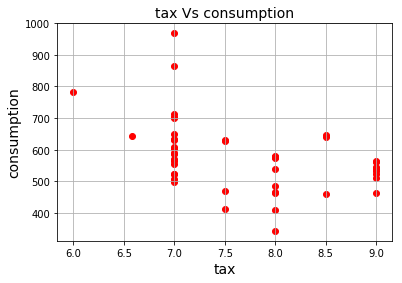

In [237]:
plt.scatter(df.iloc[:,0],df.iloc[:,4], color='red')
plt.title('tax Vs consumption', fontsize=14)
plt.xlabel('tax', fontsize=14)
plt.ylabel('consumption', fontsize=14)
plt.grid(True)
plt.show()

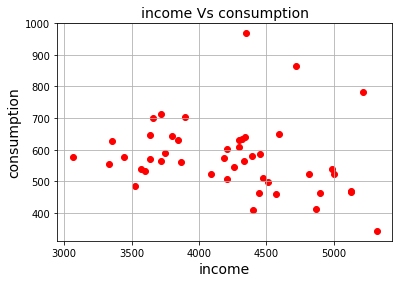

In [238]:
plt.scatter(df.iloc[:,1],df.iloc[:,4], color='red')
plt.title('income Vs consumption', fontsize=14)
plt.xlabel('income', fontsize=14)
plt.ylabel('consumption', fontsize=14)
plt.grid(True)
plt.show()

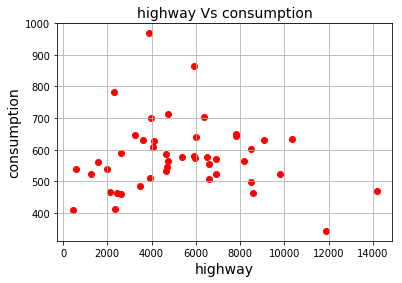

In [239]:
plt.scatter(df.iloc[:,2],df.iloc[:,4], color='red')
plt.title('highway Vs consumption', fontsize=14)
plt.xlabel('highway', fontsize=14)
plt.ylabel('consumption', fontsize=14)
plt.grid(True)
plt.show()

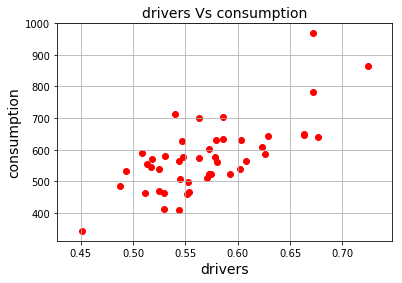

In [240]:
plt.scatter(df.iloc[:,3],df.iloc[:,4], color='red')
plt.title('drivers Vs consumption', fontsize=14)
plt.xlabel('drivers', fontsize=14)
plt.ylabel('consumption', fontsize=14)
plt.grid(True)
plt.show()

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [241]:
X = df.iloc[:,[0,3]]

In [242]:
X

,tax,dl
0,9.00,0.525
1,9.00,0.572
2,9.00,0.580
3,7.50,0.529
4,8.00,0.544
6,8.00,0.451
7,8.00,0.553
8,8.00,0.529
9,7.00,0.552
10,8.00,0.530


In [243]:
Y = df.iloc[:,4]

In [244]:
Y

0     541
1     524
2     561
3     414
4     410
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name:  consumption, dtype: int64

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [245]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [247]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [248]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 92.83010972283756
Coefficients: 
 [ -35.95445169 1333.16559274]


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [251]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_pred = regr.predict(X_test)
print('R Square Score for test set:',metrics.r2_score(Y_test, y_pred))

R Square Score for test set: -0.7014067943004703


In [252]:
pd.DataFrame({"Actual":Y_test,"Predicted":y_pred})

,Actual,Predicted
26,577,535.769241
23,547,458.486656
29,534,426.490682
4,410,530.436579
11,471,523.083658
32,577,575.764209
30,571,531.728725
12,525,606.385998
21,540,607.760183
33,628,552.413301


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [253]:
X = df.iloc[:,[0,1,2,3]]

In [254]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [255]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [256]:
y_pred = regr.predict(X_test)

In [257]:
print('R Square Score for test set:',metrics.r2_score(Y_test, y_pred))

R Square Score for test set: -0.371091669998423


# Question 9: Print the coefficients of the multilinear regression model

In [258]:

print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-4.70648705e+01 -6.98015216e-02 -5.76751094e-03  1.35011866e+03]


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

Answer:

whenever we add a variable to our model, the value of its estimated coefficient can either be zero,
in which case the proportion of explained variance (R2) stays unchanged, 
or take a nonzero value because it improves the quality of the fit. 
By construction,  R2 cannot be smaller after adding a variable.